### Regression with Deep Learning

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/opt/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1])

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


### train model

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [6]:
data = torch.from_numpy(df.values).float()

In [7]:
data.shape

torch.Size([506, 14])

In [8]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [9]:
n_epochs = 100000
learning_rate = 1e-4
print_interval = 5000

### Build Model

In [10]:
relu = nn.ReLU()
lekay_relu = nn.LeakyReLU(0.1)

In [11]:
class MyModel(nn.Module):

    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear1 = nn.Linear(input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, output_dim)
        self.act = nn.ReLU()


    def forward(self, x):
        h = self.act(self.linear1(x))
        h = self.act(self.linear2(h))
        y = self.linear3(h)

        return y

In [12]:
model = MyModel(x.size(-1), y.size(-1))

model


MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

In [13]:
'''
model = nn.Sequential(
    nn.Linear(x.size(-1), 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.Linear(3, y.size(-1))
)
'''

'\nmodel = nn.Sequential(\n    nn.Linear(x.size(-1), 3),\n    nn.LeakyReLU(),\n    nn.Linear(3, 3),\n    nn.LeakyReLU(),\n    nn.Linear(3, 3),\n    nn.LeakyReLU(),\n    nn.Linear(3, 3),\n    nn.LeakyReLU(),\n    nn.Linear(3, 3),\n    nn.LeakyReLU(),\n    nn.Linear(3, 3),\n    nn.Linear(3, y.size(-1))\n)\n'

In [14]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
for i in range(n_epochs):
    y_hat = model(x)

    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss %.4e' % (i+1, loss)) 

Epoch 5000: loss 1.4531e+01
Epoch 10000: loss 1.3165e+01
Epoch 15000: loss 1.2080e+01
Epoch 20000: loss 1.1534e+01
Epoch 25000: loss 1.1264e+01
Epoch 30000: loss 1.0963e+01
Epoch 35000: loss 1.0795e+01
Epoch 40000: loss 1.0630e+01
Epoch 45000: loss 1.0445e+01
Epoch 50000: loss 1.0252e+01
Epoch 55000: loss 9.6820e+00
Epoch 60000: loss 9.1264e+00
Epoch 65000: loss 8.8501e+00
Epoch 70000: loss 8.7033e+00
Epoch 75000: loss 8.5856e+00
Epoch 80000: loss 8.4916e+00
Epoch 85000: loss 8.4127e+00
Epoch 90000: loss 8.3533e+00
Epoch 95000: loss 8.3052e+00
Epoch 100000: loss 8.2641e+00


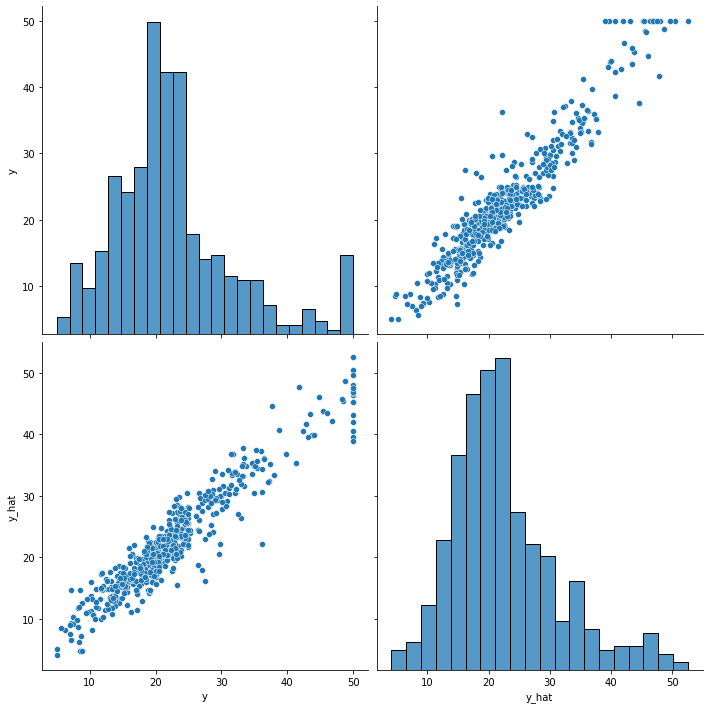

In [16]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()